In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot

# matplotlib 对中文的支持及保存为 pdf 格式
from matplotlib import rcParams
rcParams['font.family'] = 'Microsoft YaHei'
rcParams["pdf.fonttype"] = 42

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 二项分布

我们用 `scipy.stats` 包中的 `binom` 对象生成一个二项分布随机变量。`binom` 对象是 `rv_discrete` 类的一个实例，它根据二项分布的定义实现了 `rv_discrete` 类中的抽象方法。

binom 中概率密度函数的定义如下:
```
binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
```
其中 `k in {0, 1,..., n}`， `n` 和 `p` 是二项分布的形状参数.

In [4]:
from scipy.stats import binom

n, p = 5, 0.4       # 二项分布的参数
size = 10           # 生成的随机数的个数
brv = binom(n, p)   # 定义一个服从参数为 n, p 的二项分布的随机变量
print("随机生成 {} 个服从参数为 n={}, p={} 的服从二项分布的随机数：{}".format(size, n, p, brv.rvs(size)))

随机生成 10 个服从参数为 n=5, p=0.4 的服从二项分布的随机数：[2 2 1 1 1 2 1 1 3 2]


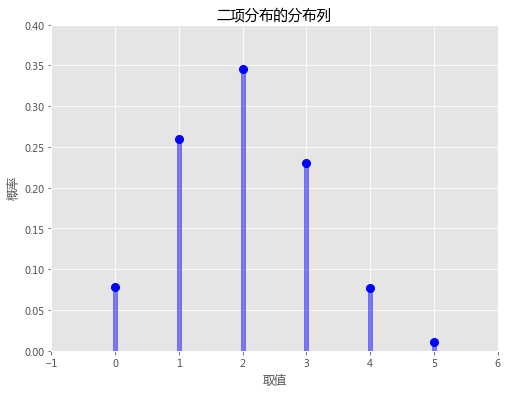

In [7]:
# 下面我们画二项分布的密度函数
fig = pyplot.figure(figsize=(8, 6))

x = range(n + 1)

# 注意二项分布的密度函数可以写成 brv.pmf(x), 也可以写成 binom.pmf(x,n,p)
pyplot.plot( x, brv.pmf( x ), 'bo', ms=8, label='二项分布的分布列' )
pyplot.vlines( x, 0, brv.pmf( x ), colors='b', lw=5, alpha=0.5 )

# 画图范围
pyplot.xlim( -1, n+1 )
pyplot.ylim( 0, 0.4)

pyplot.title('二项分布的分布列')
pyplot.xlabel('取值')
pyplot.ylabel('概率')
pyplot.show()

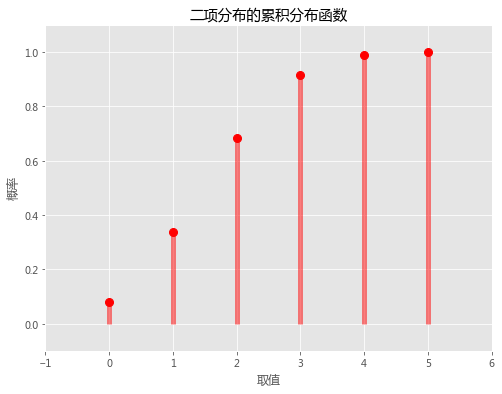

In [8]:
# 下面我们在画一下二项分布的分布函数
fig2 = pyplot.figure( figsize=(8, 6) )

# 注意二项分布的分布函数可以写成 brv.cdf(x), 也可以写成 binom.cdf(x,n,p)
pyplot.plot( x, brv.cdf( x ), 'ro', ms=8, label='二项分布的累积分布函数' )
pyplot.vlines( x, 0, brv.cdf( x ), colors='r', lw=5, alpha=0.5 )

# 画图范围
pyplot.xlim( -1, n+1 )
pyplot.ylim( -0.1, 1.1)

pyplot.title('二项分布的累积分布函数')
pyplot.xlabel('取值')
pyplot.ylabel('概率')
pyplot.show()

### 例 机票超售问题

200 座的客机，每个乘客有 5% 的可能性不来，问超售多少机票合理?

假设超售 m 张机票，则上面的问题可以用 200 重独立伯努利试验模型描述，设要求登机乘客数为 $X$，则 $X \sim {\rm Bin}(200+m, p)$。

方便起见，令 $Y$ 表示买票却未来的乘客数，则有 $X+Y=200+m$

有乘客上不了飞机的概率 $Pr(X > 200) = Pr(Y < m)$

下面，对超售的机票数 m 的每一个取值我们计算有乘客上不了机的概率

In [ ]:
from scipy.stats import binom   # 计算二项分布的函数

m_max = 10  # 超售机票的最大数量

seat_num = 200    # seat_num 表示飞机实有的座位数

p = 0.05   # 乘客不来的概率

# 定义计算超售 m 张机票的情况下有旅客上不了飞机的概率
def lack_seat_prob(seat_num, m, p) :
    binom.cdf( m, seat_num + m, p )

# 计算简便起见，用泊松分布近似二项分布，令 lambda=(200+m) * 0.05，则 200+m 个持票乘客中有 k 个不来的概率为 Pois(k,lambda)

# 下面，对 m 的每一个取值我们计算有乘客上不了机的概率

m <- seq(1, 50, 1)   # m 为超售的机票数向量
prob <- rep(0, length(m))   # prob 为对应于各个机票的概率向量, 初始化为 0
seat.num <- 200    # seat.num 表示飞机实有的座位数
p <- 0.05   # 乘客不来的概率

for(i in c(1:length(m))){
  # 计算 seat.num + m[i] 个持票旅客中有 k 个不来的概率 
  lambda <- (seat.num + m[i])*p
  
  k <- c(0:m[i]-1)
  kp <- rep(0, length(k))
  for(j in k){
    kp[j+1] <- round(PoisDist(j, lambda),5)
  }
  prob[i] <- sum(kp)
}

# 生成一个数据框用于存储结果
dist <- data.frame(Overbooks = m, Probability = prob)

# 显示结果
print(dist)

# 画图
plot(dist, main="超售概率分布图", xlab="超售的座位数", ylab="座位不够的概率")